<a href="https://colab.research.google.com/github/rbsvd/Task-1_DataCleaningandPreprocessing/blob/main/Task_1_Data_Cleaning_and_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Data Cleaning and Preprocessing – Advanced Approach

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/KaggleV2-May-2016.csv'
df = pd.read_csv(file_path)

print("✅ Data Preview:")
print(df.head(), "\n")

print("📋 Dataset Info:")
print(df.info(), "\n")

print("📊 Descriptive Statistics:")
print(df.describe(include='all'))

✅ Data Preview:
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           

Explanation:

.head() → first 5 rows

.info() → data types, non-null counts

.describe() → stats summary

Step 2: Identify Missing Values

In [ ]:

missing_values = df.isnull().sum()
print(missing_values)

missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent)

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64
PatientId         0.0
AppointmentID     0.0
Gender            0.0
ScheduledDay      0.0
AppointmentDay    0.0
Age               0.0
Neighbourhood     0.0
Scholarship       0.0
Hipertension      0.0
Diabetes          0.0
Alcoholism        0.0
Handcap           0.0
SMS_received      0.0
No-show           0.0
dtype: float64


Handling Missing Values:

1. Remove rows/columns with excessive missing values

In [ ]:

df = df.loc[:, df.isnull().mean() < 0.5]

df.dropna(inplace=True)


2. Fill missing values intelligently

In [ ]:

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0] if not df['Gender'].mode().empty else 'Unknown')

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13       

Notes for interviews:

.dropna() → removes missing data

.fillna() → imputes missing data

Median is better for skewed data; mean can be used if distribution is normal.

Step 3: Handle Duplicates

Tip: Always check subset of columns if duplicates are defined only by certain fields:

In [ ]:

duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

df.drop_duplicates(inplace=True)

Duplicate rows: 0


Tip: Always check subset of columns if duplicates are defined only by certain fields:

In [ ]:
df.drop_duplicates(subset=['PatientId'], inplace=True)

print(f"Number of rows after dropping duplicates based on PatientId: {len(df)}")

Number of rows after dropping duplicates based on PatientId: 62299


Now have 62,299 unique Patient IDs in our dataset, which likely means duplicates (patients appearing more than once) were removed.

Step 4: Standardize Text Data


Common issues: inconsistent gender, country names, casing, extra spaces

In [ ]:
df['Gender'] = df['Gender'].str.strip().str.lower()

df['Gender'] = df['Gender'].replace({'m': 'male', 'f': 'female', 'female ': 'female'})


Step 5: Handle Inconsistent Date Formats

In [ ]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], errors='coerce')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], errors='coerce')

invalid_scheduled = df['ScheduledDay'].isnull().sum()
invalid_appointment = df['AppointmentDay'].isnull().sum()

print(f"Invalid ScheduledDay: {invalid_scheduled}")
print(f"Invalid AppointmentDay: {invalid_appointment}")

df.dropna(subset=['ScheduledDay', 'AppointmentDay'], inplace=True)

df['scheduled_date'] = df['ScheduledDay'].dt.date
df['appointment_date'] = df['AppointmentDay'].dt.date
df['scheduled_time'] = df['ScheduledDay'].dt.time

df['waiting_days'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

print(df[['ScheduledDay', 'AppointmentDay', 'waiting_days']].head())

Invalid ScheduledDay: 0
Invalid AppointmentDay: 0
               ScheduledDay            AppointmentDay  waiting_days
0 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00            -1
1 2016-04-29 16:08:27+00:00 2016-04-29 00:00:00+00:00            -1
2 2016-04-29 16:19:04+00:00 2016-04-29 00:00:00+00:00            -1
3 2016-04-29 17:29:31+00:00 2016-04-29 00:00:00+00:00            -1
4 2016-04-29 16:07:23+00:00 2016-04-29 00:00:00+00:00            -1


pd.to_datetime(..., errors='coerce') → safely converts string to datetime and replaces invalid values with NaT.

We remove rows where conversion failed.

We create extra features (scheduled_date, appointment_date, waiting_days) useful later for analysis.

Step 6: Rename Columns for Uniformity

In [ ]:
df.columns = df.columns.str.lower().str.replace('-', '_').str.replace(' ', '_')

print("✅ Columns after renaming:")
print(df.columns)

✅ Columns after renaming:
Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show',
       'scheduled_date', 'appointment_date', 'scheduled_time', 'waiting_days'],
      dtype='object')


Reason: Clean column names help when writing models and avoid syntax issues.

Step 7: Check and Fix Data Types

In [ ]:
df['age'] = df['age'].astype(int)

df['gender'] = df['gender'].astype('category')

df['no_show'] = df['no_show'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62299 entries, 0 to 110524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   patientid         62299 non-null  float64            
 1   appointmentid     62299 non-null  int64              
 2   gender            62299 non-null  category           
 3   scheduledday      62299 non-null  datetime64[ns, UTC]
 4   appointmentday    62299 non-null  datetime64[ns, UTC]
 5   age               62299 non-null  int64              
 6   neighbourhood     62299 non-null  object             
 7   scholarship       62299 non-null  int64              
 8   hipertension      62299 non-null  int64              
 9   diabetes          62299 non-null  int64              
 10  alcoholism        62299 non-null  int64              
 11  handcap           62299 non-null  int64              
 12  sms_received      62299 non-null  int64              
 13  no_sh

Step 8: Check and Fix Data Types

After your previous cleaning steps (removing invalid ages, fixing waiting days, etc.)

In [ ]:
df = df.copy()

df['patientid'] = df['patientid'].astype('int64', errors='ignore')
df['appointmentid'] = df['appointmentid'].astype('int64', errors='ignore')

df['gender'] = df['gender'].astype('category')
df['neighbourhood'] = df['neighbourhood'].astype('category')
df['no_show'] = df['no_show'].astype('category')

df['age'] = df['age'].astype(int)
df['waiting_days'] = df['waiting_days'].astype(int)

print("✅ Data types after fixing:")
print(df.dtypes)

✅ Data types after fixing:
patientid                         int64
appointmentid                     int64
gender                         category
scheduledday        datetime64[ns, UTC]
appointmentday      datetime64[ns, UTC]
age                               int64
neighbourhood                  category
scholarship                       int64
hipertension                      int64
diabetes                          int64
alcoholism                        int64
handcap                           int64
sms_received                      int64
no_show                        category
scheduled_date                   object
appointment_date                 object
scheduled_time                   object
waiting_days                      int64
dtype: object


Step 9: Outlier Detection & Treatment

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age: cap between 0 and 100
df['age'] = df['age'].clip(lower=0, upper=100)

# Waiting Days: cap between 0 and 180
df['waiting_days'] = df['waiting_days'].clip(lower=0, upper=180)

Step 10: Visualizations

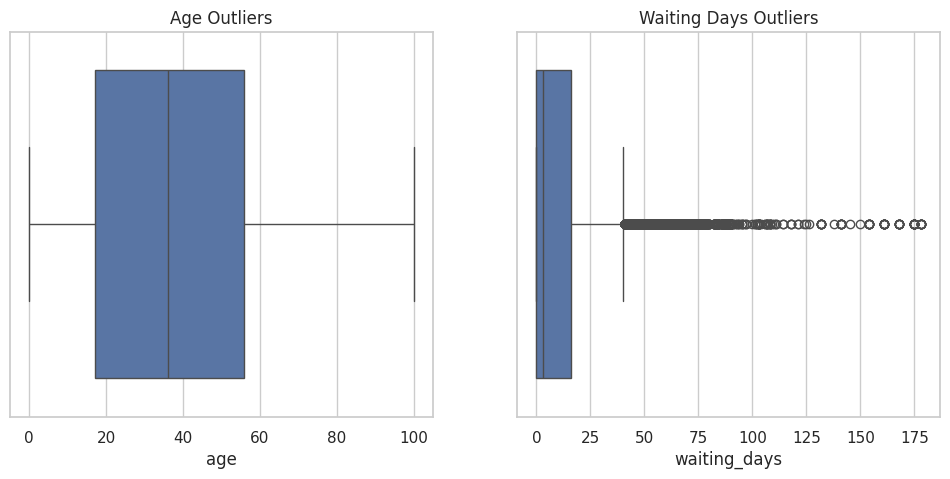

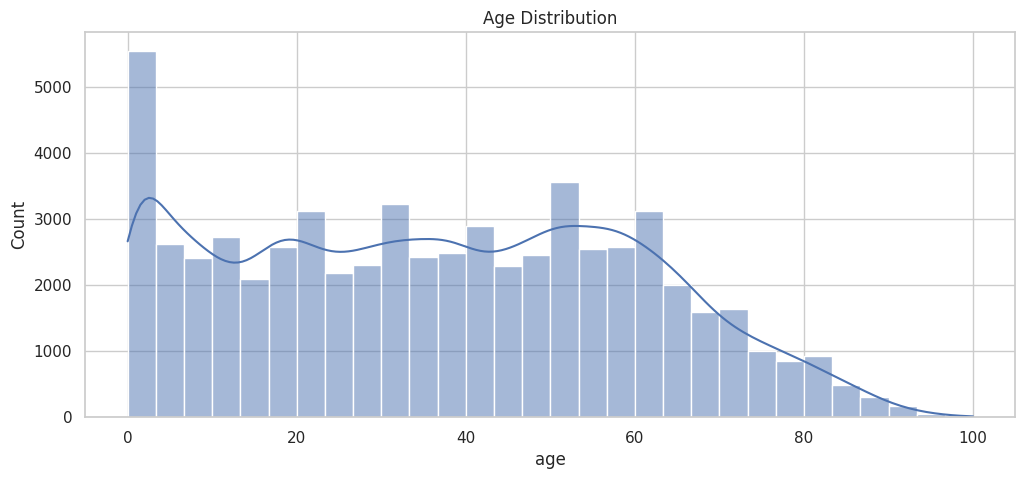

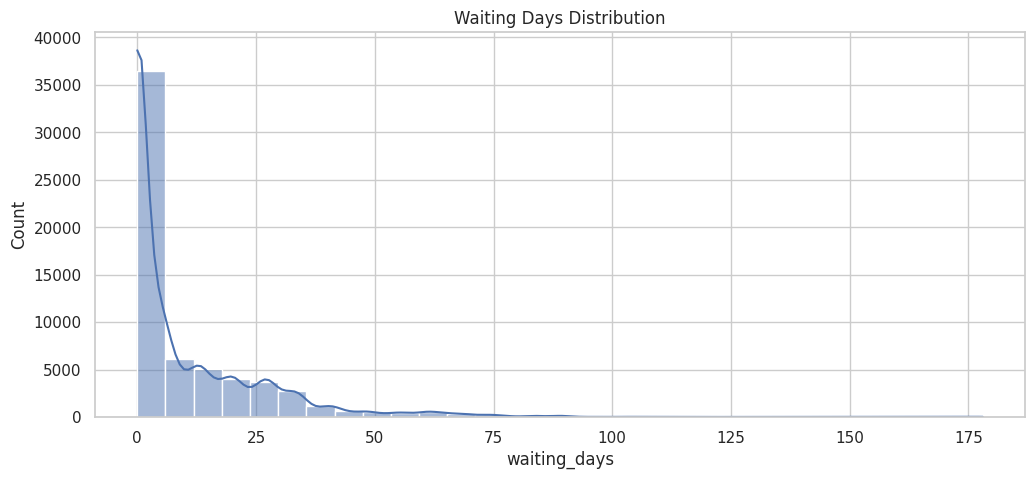

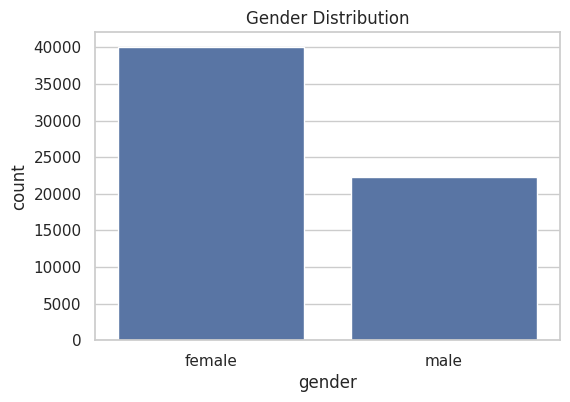

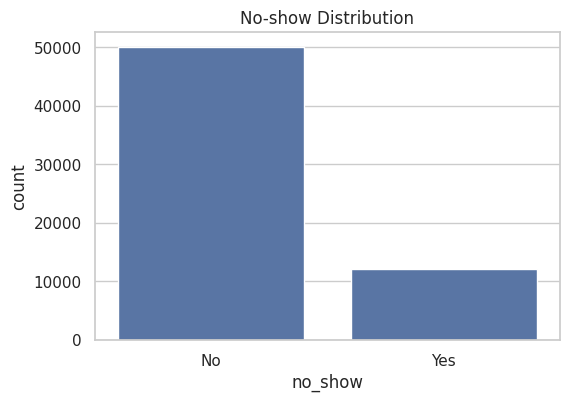

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['age'])
plt.title('Age Outliers')

plt.subplot(1,2,2)
sns.boxplot(x=df['waiting_days'])
plt.title('Waiting Days Outliers')
plt.show()

# Age distribution
plt.figure(figsize=(12,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Waiting Days distribution
plt.figure(figsize=(12,5))
sns.histplot(df['waiting_days'], bins=30, kde=True)
plt.title('Waiting Days Distribution')
plt.show()

# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

# No-show distribution
plt.figure(figsize=(6,4))
sns.countplot(x='no_show', data=df)
plt.title('No-show Distribution')
plt.show()

Fixing Outliers in Waiting days

In [ ]:

Q1 = df['waiting_days'].quantile(0.25)
Q3 = df['waiting_days'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['waiting_days'] = df['waiting_days'].clip(lower=lower_bound, upper=upper_bound)

remaining_outliers = df[(df['waiting_days'] < lower_bound) | (df['waiting_days'] > upper_bound)]
print(f"Number of Waiting Days outliers remaining: {len(remaining_outliers)}")

Number of Waiting Days outliers remaining: 0


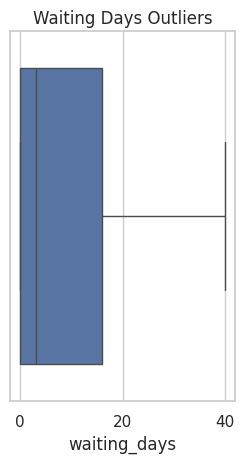

In [ ]:
plt.subplot(1,2,2)
sns.boxplot(x=df['waiting_days'])
plt.title('Waiting Days Outliers')
plt.show()

Step 11: Final Verification of Cleaned Dataset

🧹 Missing values per column:
 patientid           0
appointmentid       0
gender              0
scheduledday        0
appointmentday      0
age                 0
neighbourhood       0
scholarship         0
hipertension        0
diabetes            0
alcoholism          0
handcap             0
sms_received        0
no_show             0
scheduled_date      0
appointment_date    0
scheduled_time      0
waiting_days        0
dtype: int64

📋 Number of duplicate rows: 0

🔢 Numeric summary:
                age  waiting_days
count  62299.000000  62299.000000
mean      36.704361      9.430216
std       23.529722     12.488187
min        0.000000      0.000000
25%       17.000000      0.000000
50%       36.000000      3.000000
75%       56.000000     16.000000
max      100.000000     40.000000


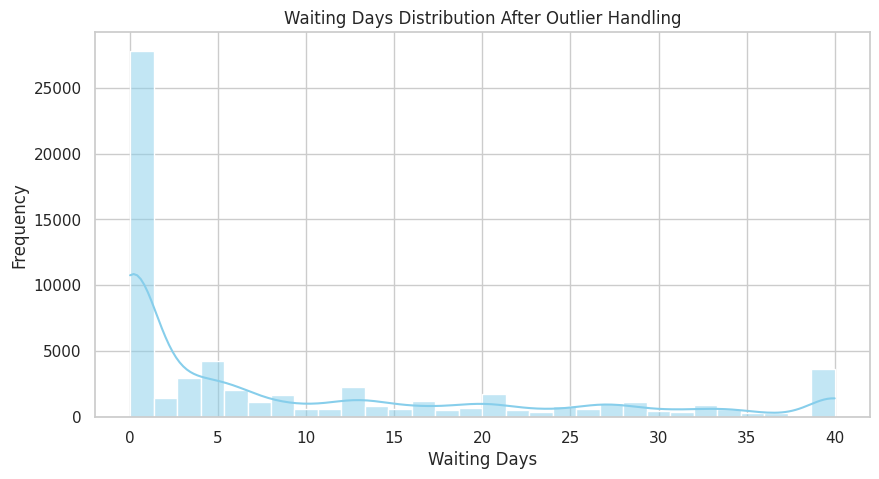

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

df = df.copy()

missing_values = df.isnull().sum()
print("🧹 Missing values per column:\n", missing_values)

duplicates = df.duplicated().sum()
print("\n📋 Number of duplicate rows:", duplicates)

print("\n🔢 Numeric summary:")
print(df[['age', 'waiting_days']].describe())

plt.figure(figsize=(10,5))
sns.histplot(df['waiting_days'], bins=30, kde=True, color='skyblue')
plt.title('Waiting Days Distribution After Outlier Handling')
plt.xlabel('Waiting Days')
plt.ylabel('Frequency')
plt.show()

Step 12: Saving and Accessing Final Cleaned dataset

In [85]:
final_file = 'Medical_Appointment_NoShows_Cleaned_Final.csv'
df.to_csv(final_file, index=False)
print(f"\n✅ Final cleaned dataset saved as '{final_file}' with {len(df)} rows.")

files.download(final_file)


✅ Final cleaned dataset saved as 'Medical_Appointment_NoShows_Cleaned_Final.csv' with 62299 rows.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>